# Marketing ROI – Exploratory Data Analysis

## 1. Business Context

## 2. Data Overview

In [2]:
# Package and data import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

df = pd.read_csv("data/raw/marketing_roi_dataset.csv", parse_dates=["date"])
df.head()

,date,google_ads_spend,facebook_ads_spend,email_marketing_spend,influencer_spend,organic_traffic,email_sends,site_visits,conversions,revenue
0,2024-01-01,287.241527,38.751217,83.458307,56.837735,4284.075974,20833.136195,15852.676595,910.435777,-8969.378951
1,2024-01-02,179.335768,140.549719,NaN,20.403910,5547.499386,24988.993202,37961.341321,1271.621378,4996.218917
2,2024-01-03,165.874030,159.783970,15.718533,31.799587,1346.412153,24788.546292,37498.939314,817.848802,4703.488945
3,2024-01-04,165.876275,36.386370,35.434882,8.369025,6225.962257,11454.994399,36641.290979,1204.408229,1857.547269
4,2024-01-05,557.965729,116.865127,8.933307,264.236853,6723.641641,31469.636402,32982.737989,1315.849949,7763.494686


In [3]:
# Schema and summary information

df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1000 non-null   datetime64[ns]
 1   google_ads_spend       950 non-null    float64       
 2   facebook_ads_spend     950 non-null    float64       
 3   email_marketing_spend  950 non-null    float64       
 4   influencer_spend       950 non-null    float64       
 5   organic_traffic        950 non-null    float64       
 6   email_sends            950 non-null    float64       
 7   site_visits            950 non-null    float64       
 8   conversions            950 non-null    float64       
 9   revenue                1000 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 78.2 KB


,count,mean,min,25%,50%,75%,max,std
date,1000,2025-05-14 12:00:00,2024-01-01 00:00:00,2024-09-06 18:00:00,2025-05-14 12:00:00,2026-01-19 06:00:00,2026-09-26 00:00:00,NaN
google_ads_spend,950.0,278.538146,5.510277,123.474699,210.754128,336.692252,7006.077877,375.215794
facebook_ads_spend,950.0,195.406462,2.327444,90.404891,159.483845,244.331656,2425.053989,179.329445
email_marketing_spend,950.0,58.835908,0.211186,25.021036,47.236664,82.127735,373.804054,46.906342
influencer_spend,950.0,85.66024,0.330408,28.510643,60.250737,120.089852,703.641999,80.610073
organic_traffic,950.0,4995.960394,396.013342,4151.292379,4970.314892,5869.920258,9052.859503,1269.97673
email_sends,950.0,20152.623976,4870.371191,16237.509366,20127.415054,23999.796429,38946.627698,5880.954234
site_visits,950.0,29894.592065,-1379.202013,24752.712408,30076.992579,35000.599413,53312.873726,7726.449355
conversions,950.0,1189.714006,187.32627,994.139269,1179.003079,1396.858054,2040.411897,292.442587
revenue,1000.0,2433.043276,-16329.076524,-916.706634,2421.080779,5894.710904,31589.536448,5309.341622


## 3. Data Quality Checks

In [6]:
# Date range

df["date"].min(), df["date"].max()

(Timestamp('2024-01-01 00:00:00'), Timestamp('2026-09-26 00:00:00'))

In [5]:
# Time series logic

df["date"].is_monotonic_increasing

True

## 4. Missing Data Analysis

In [7]:
# Missing value percentage

missing_pct = df.isna().mean().sort_values(ascending=False)
missing_pct

google_ads_spend         0.05
facebook_ads_spend       0.05
email_marketing_spend    0.05
influencer_spend         0.05
organic_traffic          0.05
email_sends              0.05
site_visits              0.05
conversions              0.05
date                     0.00
revenue                  0.00
dtype: float64

## 5. Distribution Analysis

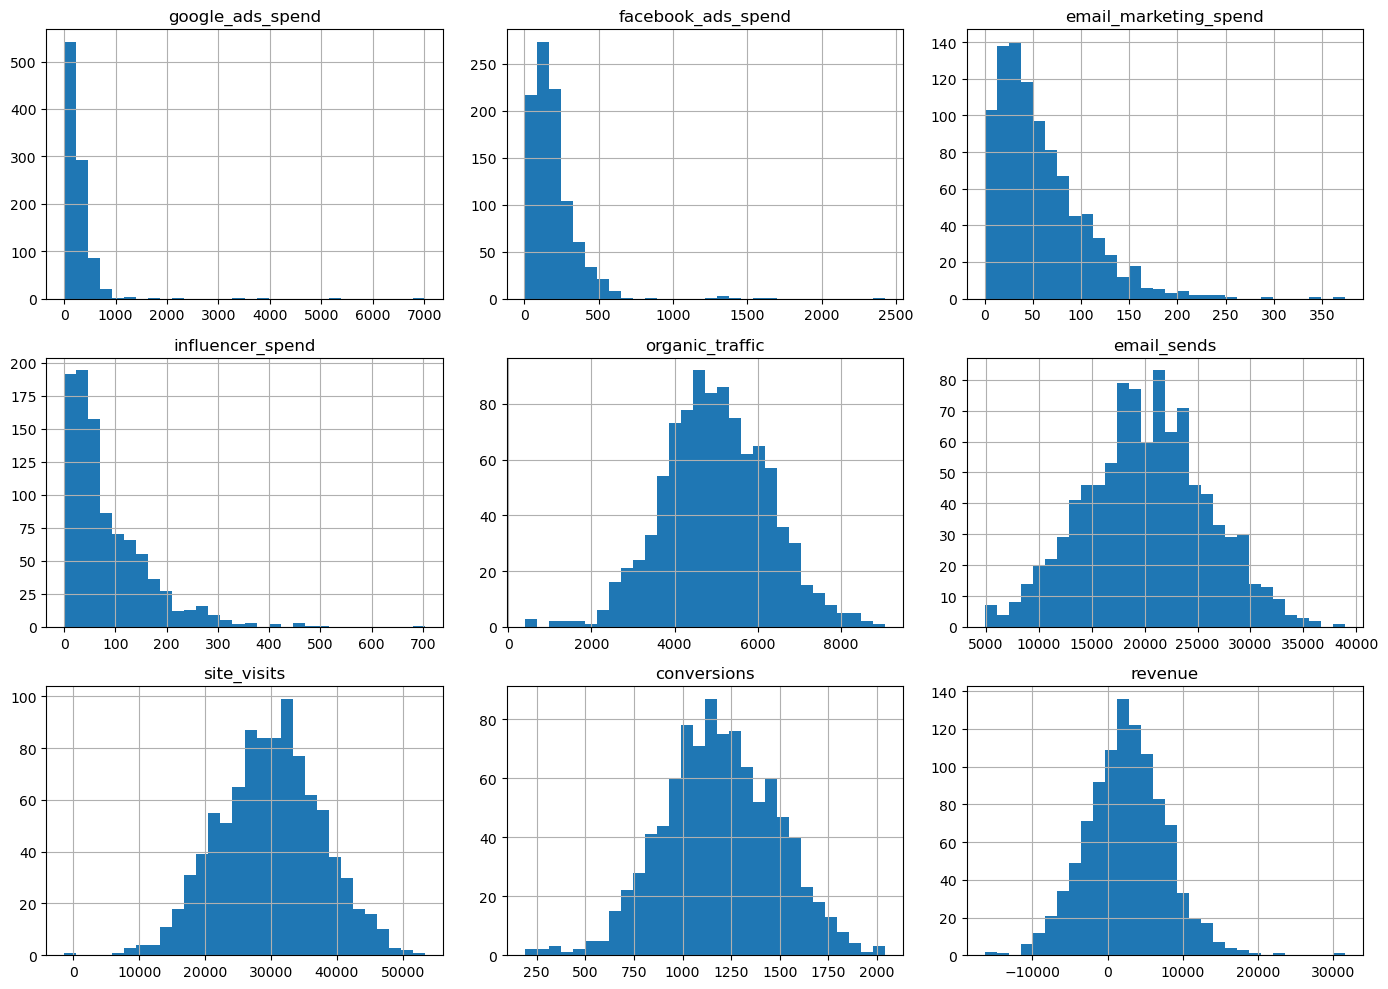

In [9]:
# Distribution of variables

numeric_cols = df.select_dtypes(include="number").columns

df[numeric_cols].hist(figsize=(14,10), bins=30)
plt.tight_layout()
plt.show()

## 6. Outlier Exploration

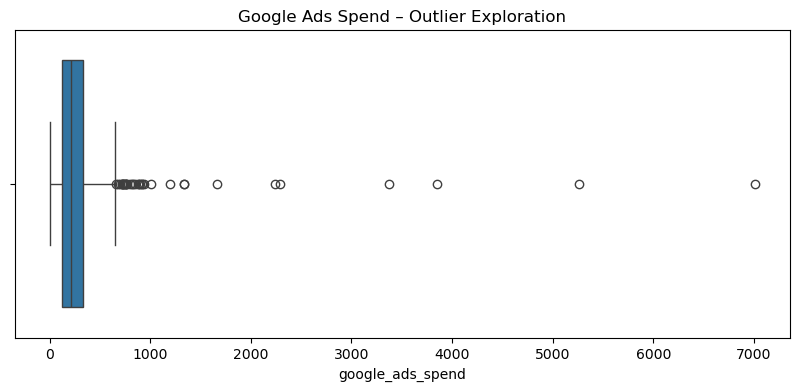

In [10]:
# Google ads outliers

plt.figure(figsize=(10,4))
sns.boxplot(x=df["google_ads_spend"])
plt.title("Google Ads Spend – Outlier Exploration")
plt.show()

In [11]:
# Google ads distribution data

df["google_ads_spend"].quantile([0.95, 0.99])

0.95     610.962001
0.99    1106.860940
Name: google_ads_spend, dtype: float64

## 7. Revenue Relationships

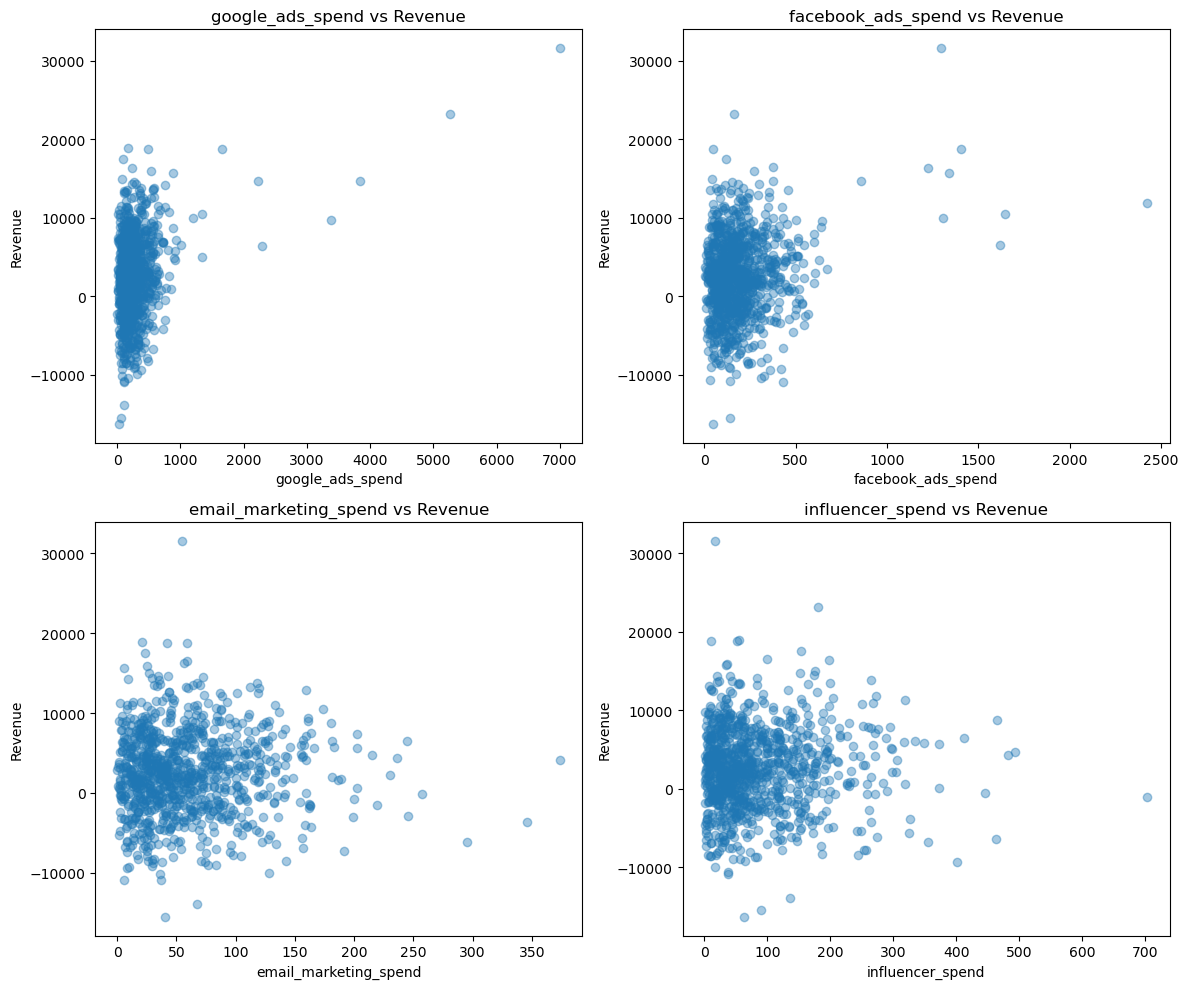

In [12]:
# Spending vs. revenue scatterplots

channels = [
    "google_ads_spend",
    "facebook_ads_spend",
    "email_marketing_spend",
    "influencer_spend"
]

fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten()

for ax, col in zip(axes, channels):
    ax.scatter(df[col], df["revenue"], alpha=0.4)
    ax.set_title(f"{col} vs Revenue")
    ax.set_xlabel(col)
    ax.set_ylabel("Revenue")

plt.tight_layout()
plt.show()

## 8. Correlation & Multicollinearity

In [15]:
# Correlation matrix

corr_matrix = df.corr()

# Display correlation matrix as a table
corr_matrix

,date,google_ads_spend,facebook_ads_spend,email_marketing_spend,influencer_spend,organic_traffic,email_sends,site_visits,conversions,revenue
date,1.000000,0.032414,0.063015,-0.052863,0.017441,0.016626,-0.037469,-0.010808,0.001002,-0.008830
google_ads_spend,0.032414,1.000000,0.280433,0.003735,0.041805,0.021639,-0.010625,-0.019962,0.077261,0.311921
facebook_ads_spend,0.063015,0.280433,1.000000,-0.031539,0.040844,0.040374,-0.021618,0.063099,-0.053191,0.206978
email_marketing_spend,-0.052863,0.003735,-0.031539,1.000000,0.035099,0.016314,-0.011642,-0.000218,0.024462,0.008866
influencer_spend,0.017441,0.041805,0.040844,0.035099,1.000000,0.072961,-0.054656,0.023650,0.062339,0.014139
organic_traffic,0.016626,0.021639,0.040374,0.016314,0.072961,1.000000,0.002791,0.031157,0.019917,0.007068
email_sends,-0.037469,-0.010625,-0.021618,-0.011642,-0.054656,0.002791,1.000000,-0.026128,-0.004067,0.043107
site_visits,-0.010808,-0.019962,0.063099,-0.000218,0.023650,0.031157,-0.026128,1.000000,-0.014920,-0.025390
conversions,0.001002,0.077261,-0.053191,0.024462,0.062339,0.019917,-0.004067,-0.014920,1.000000,0.000649
revenue,-0.008830,0.311921,0.206978,0.008866,0.014139,0.007068,0.043107,-0.025390,0.000649,1.000000


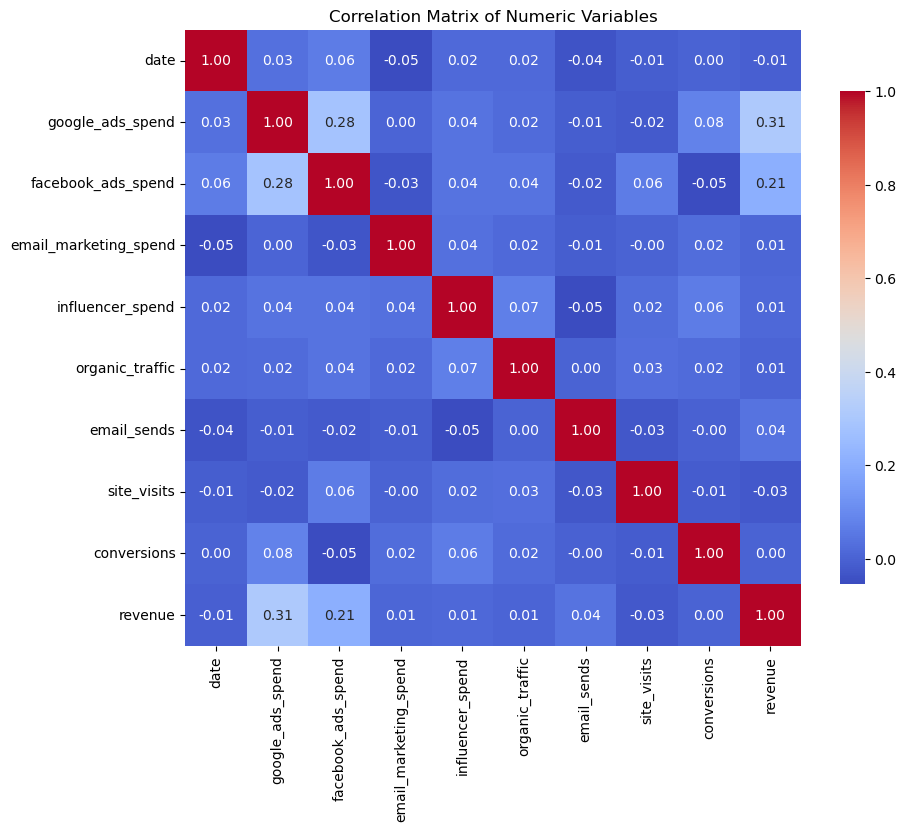

In [16]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True,           # show correlation numbers
    fmt=".2f",            # 2 decimal places
    cmap="coolwarm",      # color map
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

## 9. EDA Summary & Next Steps